NumPy version: 1.26.0
pandas version: 1.5.3
TensorFlow version: 2.19.0
CSV Columns: ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'Start of Block_Id', 'Start of Block_Name', 'Start of Block_Size', 'Start of Block_Type', 'Q1', 'Q2', 'Q3', 'Q3_5_TEXT', 'Q4', 'Q5', 'Q6', 'Q7', 'Q7_7_TEXT', 'Q8', 'Q9-1', 'Q9-1_13_TEXT', 'Q9-2', 'Q9-2_13_TEXT', 'Q9-3', 'Q10', 'Q11', 'Q12_1', 'Q12_2', 'Q12_3', 'Q13', 'Q13_9_TEXT', 'Q14', 'Q14_7_TEXT', 'Q15', 'Q15_7_TEXT', 'Q16', 'Q16_7_TEXT', 'Q17', 'Q18', 'Q18_5_TEXT', 'Q19_1', 'Q20', 'Q20_1_TEXT', 'Q21_1', 'Q21_2', 'Q22', 'Q22_13_TEXT', 'Q23', 'Q24', 'Q25', 'Q26_1', 'Q27', 'Q27_11_TEXT', 'Q28', 'Q29_1', 'Q29_2', 'Q29_3', 'Q30', 'Q30_12_TEXT', 'Q31', 'Q31_6_TEXT', 'Q32', 'Q33_1', 'Q33_2', 'Q34', 'Q34_9_TEXT', 'Q35', 'Q

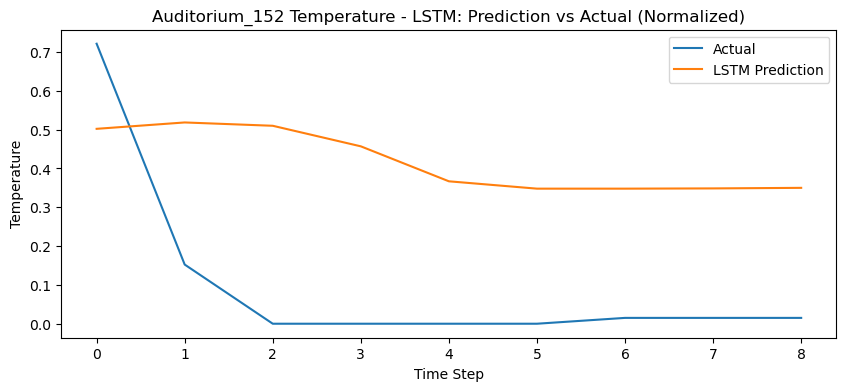

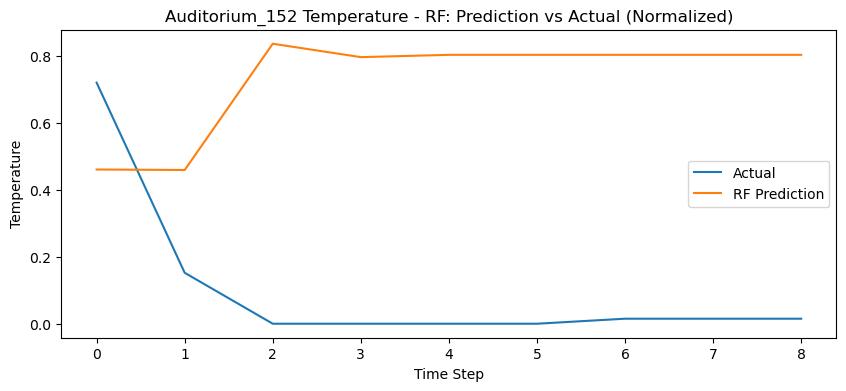


Processing Auditorium_152 - humidity
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Auditorium_152 - humidity (LSTM): MSE=0.02, RMSE=0.14, R2=-8.84
Auditorium_152 - humidity (RF): MSE=0.03, RMSE=0.16, R2=-11.26


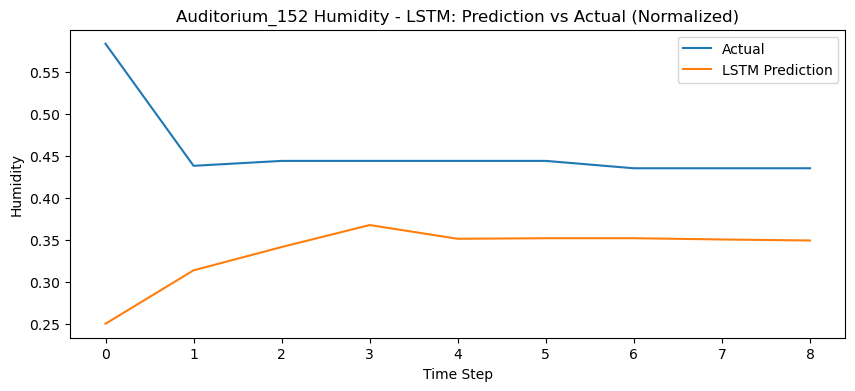

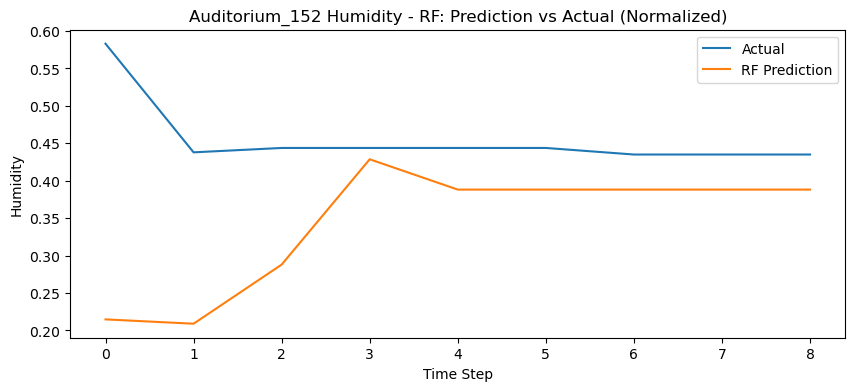


Processing Classroom_210 - temperature
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Classroom_210 - temperature (LSTM): MSE=0.03, RMSE=0.17, R2=-42.69
Classroom_210 - temperature (RF): MSE=0.05, RMSE=0.22, R2=-71.77


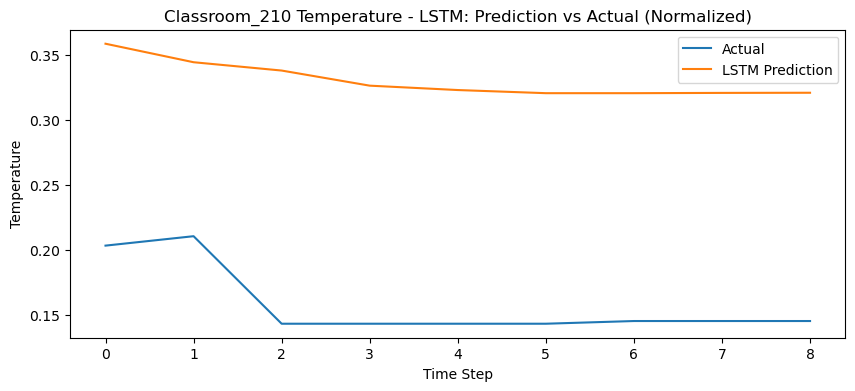

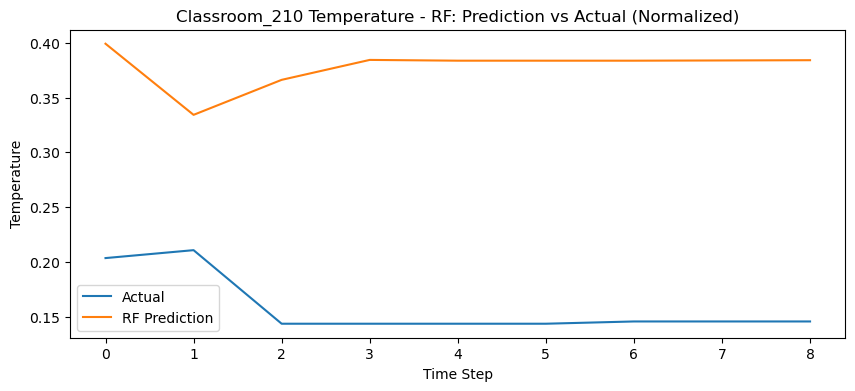


Processing Classroom_210 - humidity
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Classroom_210 - humidity (LSTM): MSE=0.04, RMSE=0.20, R2=-1.07
Classroom_210 - humidity (RF): MSE=0.06, RMSE=0.25, R2=-2.25


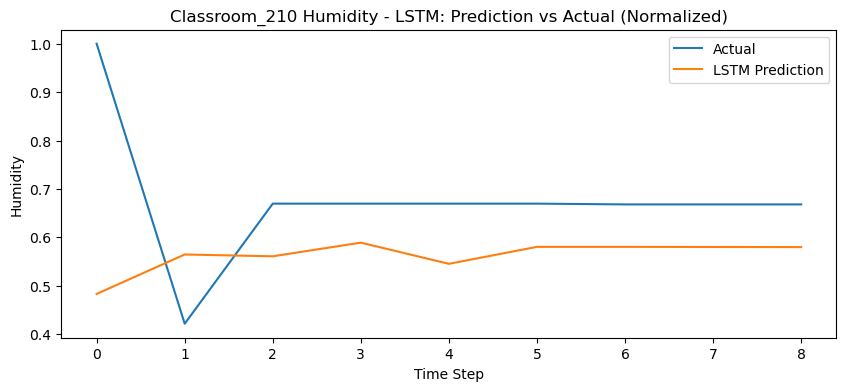

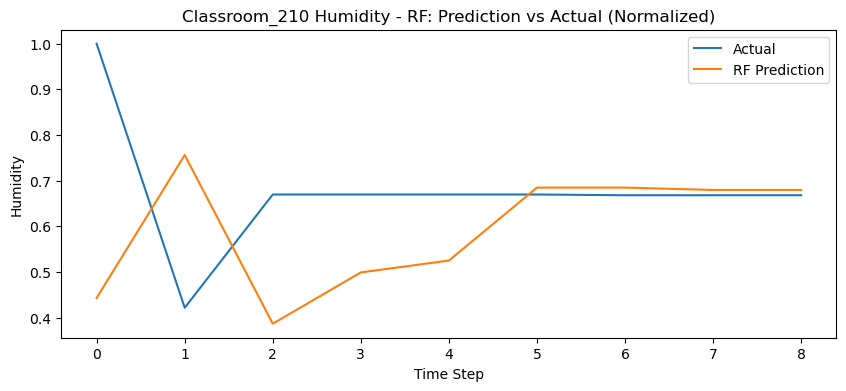


Processing Classroom_230 - temperature
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Classroom_230 - temperature (LSTM): MSE=0.02, RMSE=0.12, R2=-5.69
Classroom_230 - temperature (RF): MSE=0.01, RMSE=0.11, R2=-4.25


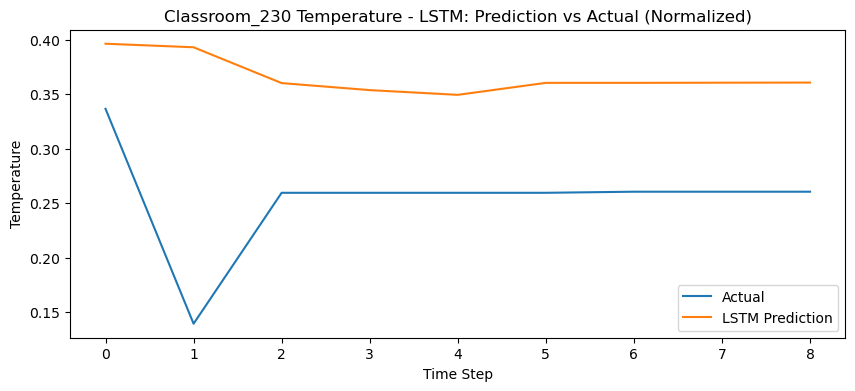

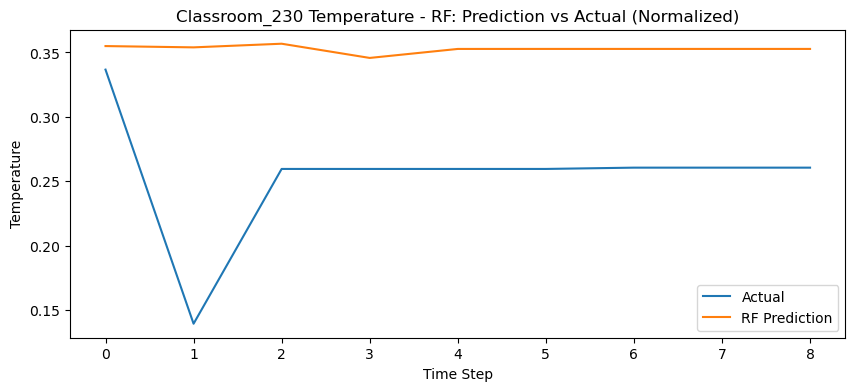


Processing Classroom_230 - humidity
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Classroom_230 - humidity (LSTM): MSE=0.03, RMSE=0.18, R2=-3.89
Classroom_230 - humidity (RF): MSE=0.05, RMSE=0.22, R2=-5.95


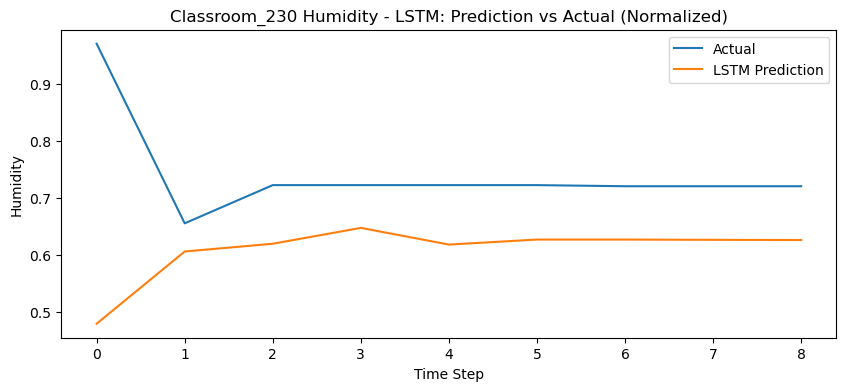

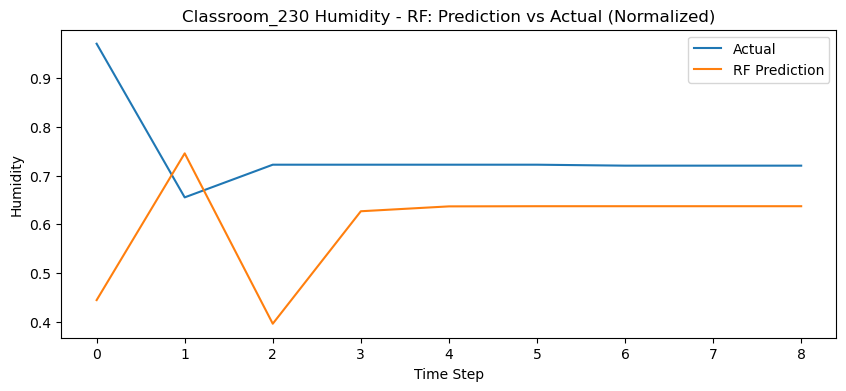


Summary of Model Performance:
Auditorium_152 - temperature:
  LSTM -> MSE: 0.14, RMSE: 0.37, R2: -1.76
  RF   -> MSE: 0.52, RMSE: 0.72, R2: -9.36
Auditorium_152 - humidity:
  LSTM -> MSE: 0.02, RMSE: 0.14, R2: -8.84
  RF   -> MSE: 0.03, RMSE: 0.16, R2: -11.26
Classroom_210 - temperature:
  LSTM -> MSE: 0.03, RMSE: 0.17, R2: -42.69
  RF   -> MSE: 0.05, RMSE: 0.22, R2: -71.77
Classroom_210 - humidity:
  LSTM -> MSE: 0.04, RMSE: 0.20, R2: -1.07
  RF   -> MSE: 0.06, RMSE: 0.25, R2: -2.25
Classroom_230 - temperature:
  LSTM -> MSE: 0.02, RMSE: 0.12, R2: -5.69
  RF   -> MSE: 0.01, RMSE: 0.11, R2: -4.25
Classroom_230 - humidity:
  LSTM -> MSE: 0.03, RMSE: 0.18, R2: -3.89
  RF   -> MSE: 0.05, RMSE: 0.22, R2: -5.95


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM  # Optionally, you can import Dropout if needed
from tensorflow.keras.optimizers import Adam

print("NumPy version:", np.__version__)         # 1.26.0
print("pandas version:", pd.__version__)         # 1.5.3
print("TensorFlow version:", tf.__version__)     # 2.19.0

# Load CSV file and preprocessing

data_path = r"/Users/JiMinPark/Desktop/Data Preprocessing/merged_20240906-20241114.csv"

temp_df = pd.read_csv(data_path, nrows=0)
print("CSV Columns:", temp_df.columns.tolist())

# we use 'timestamp' 
date_col = 'timestamp' if 'timestamp' in temp_df.columns else None

if date_col:
    df = pd.read_csv(data_path, parse_dates=[date_col])
    df = df.sort_values(date_col).reset_index(drop=True)
    print(f"Sorted by date column '{date_col}'.")
else:
    print("No date column found; loading CSV without sorting.")
    df = pd.read_csv(data_path)

print("Data shape:", df.shape)
print("Final Columns:", df.columns.tolist())

# Define room information 
rooms = {
    "Auditorium_152": {
         "temperature": "Auditorium_152_temperature, °C",
         "humidity": "Auditorium_152_humidity, %"
    },
    "Classroom_210": {
         "temperature": "Classroom_210_temperature, °C",
         "humidity": "Classroom_210_humidity, %"
    },
    "Classroom_230": {
         "temperature": "Classroom_230_temperature, °C",
         "humidity": "Classroom_230_humidity, %"
    }
}


# Define a function to create univariate time series dataset using a sliding window

def make_univariate_dataset(series, window_size=3):
    """
    Given a 1D array 'series', create a dataset for time series forecasting.
    Each sample is a window of 'window_size' consecutive values and the target is the immediate next value.
    Returns: X (samples x window_size), y (samples,)
    """
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i : i + window_size])
        y.append(series[i + window_size])
    return np.array(X), np.array(y)

window_size = 3               # Reduced window size to obtain more samples
lstm_epochs = 50              # Increased number of epochs
lstm_batch_size = 16          # Reduced batch size
lstm_learning_rate = 0.005    # Increased learning rate slightly
rf_n_estimators = 200
rf_max_depth = 10

# Loop through each room and each target measure (Temperature and Humidity)
results = {} 

for room, measures in rooms.items():
    results[room] = {}
    for measure, target_col in measures.items():
        print(f"\nProcessing {room} - {measure}")
        if target_col not in df.columns:
            print(f"Column {target_col} not found in the CSV for {room} - {measure}. Skipping.")
            continue
        
        # Extract target series and reshape to 2D for scaler (float32)
        series = df[target_col].astype(np.float32).values
        
        # Normalize the series using MinMaxScaler
        scaler = MinMaxScaler()
        scaled_series = scaler.fit_transform(series.reshape(-1, 1)).flatten()
        
        # Create dataset using sliding window method
        X, y = make_univariate_dataset(scaled_series, window_size)
        if len(X) < 2:
            print(f"Not enough data points for {room} - {measure} with window size {window_size}.")
            continue
        
        # Split into train and test (80/20)
        split_idx = int(0.8 * len(X))
        X_train, X_test = X[:split_idx], X[split_idx:]
        y_train, y_test = y[:split_idx], y[split_idx:]
        
        # LSTM Model 
        # Reshape for LSTM: (samples, window_size, 1)
        X_train_lstm = X_train.reshape(-1, window_size, 1)
        X_test_lstm = X_test.reshape(-1, window_size, 1)
        
        model_lstm = Sequential()
        model_lstm.add(tf.keras.Input(shape=(window_size, 1)))
        model_lstm.add(LSTM(units=32, activation='tanh'))
        model_lstm.add(Dense(16, activation='relu'))
        model_lstm.add(Dense(1, activation='linear'))
        model_lstm.compile(optimizer=Adam(learning_rate=lstm_learning_rate), loss='mse')
        
        history = model_lstm.fit(X_train_lstm, y_train, validation_data=(X_test_lstm, y_test),
                                 epochs=lstm_epochs, batch_size=lstm_batch_size, verbose=0)
        
        y_pred_lstm = model_lstm.predict(X_test_lstm)
        mse_lstm = mean_squared_error(y_test, y_pred_lstm)
        rmse_lstm = np.sqrt(mse_lstm)
        r2_lstm = r2_score(y_test, y_pred_lstm)

        # Random Forest Model 

        rf = RandomForestRegressor(n_estimators=rf_n_estimators, max_depth=rf_max_depth, random_state=42)
        rf.fit(X_train, y_train)
        y_pred_rf = rf.predict(X_test)
        mse_rf = mean_squared_error(y_test, y_pred_rf)
        rmse_rf = np.sqrt(mse_rf)
        r2_rf = r2_score(y_test, y_pred_rf)
        
        results[room][measure] = {
            "LSTM": {"MSE": mse_lstm, "RMSE": rmse_lstm, "R2": r2_lstm},
            "RF": {"MSE": mse_rf, "RMSE": rmse_rf, "R2": r2_rf}
        }
        
        print(f"{room} - {measure} (LSTM): MSE={mse_lstm:.2f}, RMSE={rmse_lstm:.2f}, R2={r2_lstm:.2f}")
        print(f"{room} - {measure} (RF): MSE={mse_rf:.2f}, RMSE={rmse_rf:.2f}, R2={r2_rf:.2f}")
        
        # Plot LSTM Predictions vs Actual (in normalized scale)

        plt.figure(figsize=(10,4))
        plt.plot(y_test, label="Actual")
        plt.plot(y_pred_lstm, label="LSTM Prediction")
        plt.title(f"{room} {measure.capitalize()} - LSTM: Prediction vs Actual (Normalized)")
        plt.xlabel("Time Step")
        plt.ylabel(measure.capitalize())
        plt.legend()
        plt.show()
        
        # Plot Random Forest Predictions vs Actual (in normalized scale)

        plt.figure(figsize=(10,4))
        plt.plot(y_test, label="Actual")
        plt.plot(y_pred_rf, label="RF Prediction")
        plt.title(f"{room} {measure.capitalize()} - RF: Prediction vs Actual (Normalized)")
        plt.xlabel("Time Step")
        plt.ylabel(measure.capitalize())
        plt.legend()
        plt.show()

print("\nSummary of Model Performance:")
for room, measures in results.items():
    for measure, metrics in measures.items():
        print(f"{room} - {measure}:")
        print("  LSTM -> MSE: {:.2f}, RMSE: {:.2f}, R2: {:.2f}".format(metrics["LSTM"]["MSE"],
                                                                        metrics["LSTM"]["RMSE"],
                                                                        metrics["LSTM"]["R2"]))
        print("  RF   -> MSE: {:.2f}, RMSE: {:.2f}, R2: {:.2f}".format(metrics["RF"]["MSE"],
                                                                        metrics["RF"]["RMSE"],
                                                                        metrics["RF"]["R2"]))